<h1><center><b>Project: AirQuality</b></center><h1>

# **Loading and understanding the dataset**

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('AirQualityUCI.csv', parse_dates={'DateTime': ['Date', 'Time']})
df

,DateTime,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,2004-11-23 19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,2004-11-23 20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,2004-11-17 18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,2004-11-23 18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,2004-11-26 18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-03-23 04:00:00,-200.0,993,-200,2.3,604,85,848,65,1160,762,14.5,66.4,1.0919,Very low
9353,2005-03-26 04:00:00,-200.0,1122,-200,6.0,811,181,641,92,1336,1122,16.2,71.2,1.3013,Very low
9354,2005-03-29 04:00:00,-200.0,883,-200,1.3,530,63,997,46,1102,617,13.7,68.2,1.0611,Very low
9355,2005-04-01 04:00:00,-200.0,818,-200,0.8,473,47,1257,41,898,323,13.7,48.8,0.7606,Very low


In [ ]:
df.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTime      9357 non-null   datetime64[ns]
 1   CO_GT         9357 non-null   float64       
 2   PT08_S1_CO    9357 non-null   int64         
 3   NMHC_GT       9357 non-null   int64         
 4   C6H6_GT       9357 non-null   float64       
 5   PT08_S2_NMHC  9357 non-null   int64         
 6   Nox_GT        9357 non-null   int64         
 7   PT08_S3_Nox   9357 non-null   int64         
 8   NO2_GT        9357 non-null   int64         
 9   PT08_S4_NO2   9357 non-null   int64         
 10  PT08_S5_O3    9357 non-null   int64         
 11  T             9357 non-null   float64       
 12  RH            9357 non-null   float64       
 13  AH            9357 non-null   float64       
 14  CO_level      9357 non-null   object        
dtypes: datetime64[ns](1), float64(5), int6

In [ ]:
df.shape

(9357, 15)

# **Cleaning the dataset**

In [ ]:
df['NMHC_GT'].value_counts()

-200    8443
 66       14
 29        9
 40        9
 93        8
        ... 
 206       1
 268       1
 320       1
 270       1
 10        1
Name: NMHC_GT, Length: 430, dtype: int64

In [ ]:
# 8443/9357 trong cột NMHC_GT là: -200. Cột không cần thiết -> drop
df.drop('NMHC_GT', axis=1, inplace=True)
df.drop('CO_level', axis=1, inplace=True)
df = df.drop('DateTime', axis=1)

In [ ]:
df.columns

Index(['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'Nox_GT',
       'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH'],
      dtype='object')

In [ ]:
# Trong tập dữ liệu có rất nhiều giá trị bị thiếu được tác giả gán bằng -200. Thay thế -200 với np.NaN
df.replace(to_replace=-200, value=np.NaN, inplace=True)

In [ ]:
df.isin([-200]).sum()

CO_GT           0
PT08_S1_CO      0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
dtype: int64

In [ ]:
df

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,11.9,2008.0,50.6,1980.0,1389.0,325.0,220.0,2562.0,2342.0,12.4,74.7,1.0741
1,11.5,1918.0,49.4,1958.0,1358.0,335.0,190.0,2477.0,2237.0,11.5,76.2,1.0324
2,10.2,1802.0,47.7,1924.0,748.0,356.0,192.0,2235.0,2452.0,13.7,52.8,0.8244
3,10.2,1982.0,49.5,1959.0,1369.0,322.0,227.0,2536.0,2386.0,13.2,72.6,1.0936
4,10.1,1956.0,45.2,1877.0,1389.0,347.0,255.0,2338.0,2465.0,15.5,62.8,1.0979
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,NaN,993.0,2.3,604.0,85.0,848.0,65.0,1160.0,762.0,14.5,66.4,1.0919
9353,NaN,1122.0,6.0,811.0,181.0,641.0,92.0,1336.0,1122.0,16.2,71.2,1.3013
9354,NaN,883.0,1.3,530.0,63.0,997.0,46.0,1102.0,617.0,13.7,68.2,1.0611
9355,NaN,818.0,0.8,473.0,47.0,1257.0,41.0,898.0,323.0,13.7,48.8,0.7606


In [ ]:
# Sử dụng fillna để thay thế các giá trị bị missing với giá trị trung bình
col_list = df.columns[0:13]
for i in col_list:
  df[i] = df[i].fillna(df[i].mean())

In [ ]:
# Kiểm tra lại còn giá trị bị Null không
df.isnull().sum()

CO_GT           0
PT08_S1_CO      0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
dtype: int64

In [ ]:
# Review lại dữ liệu 
df.describe()

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.152750,1099.833166,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.316068,212.791672,7.302650,261.560236,193.426632,251.743954,43.920954,339.367559,390.612324,8.657639,16.974801,0.395835
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.200000,941.000000,4.600000,743.000000,112.000000,666.000000,86.000000,1242.000000,742.000000,12.000000,36.600000,0.746100
50%,2.152750,1075.000000,8.600000,923.000000,229.000000,818.000000,113.091251,1456.264598,983.000000,18.300000,49.234201,1.015400
75%,2.600000,1221.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


# **Data Correlation**

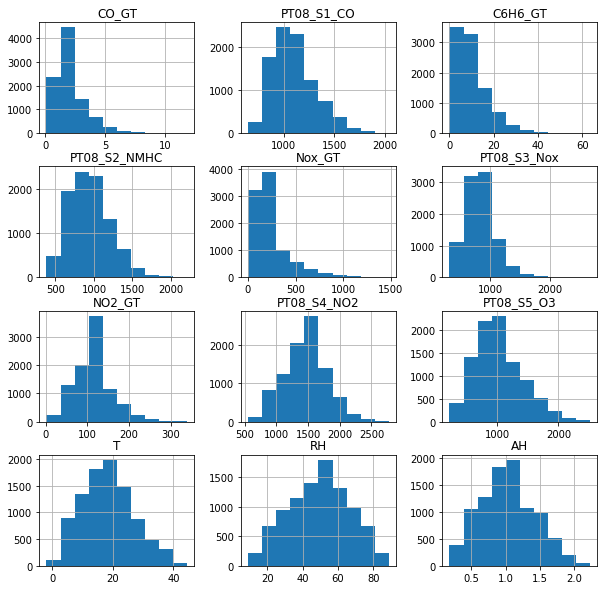

In [ ]:
df.hist(figsize=(10,10));

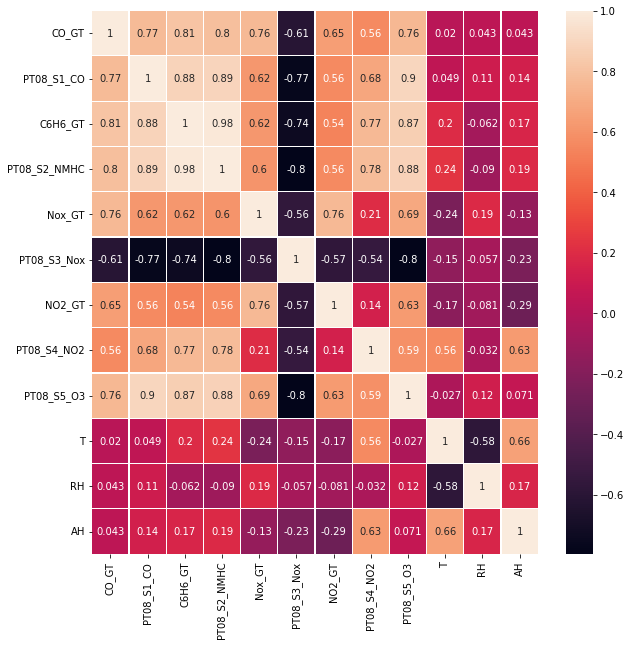

In [ ]:
corrmat = df.corr()
topcorr = corrmat.index
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidth=.2)

In [ ]:
# sns.pairplot(df)

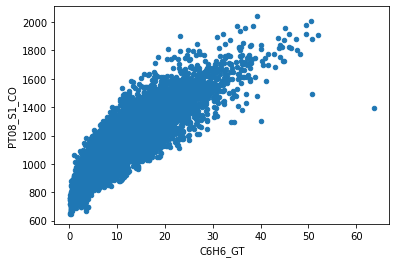

In [ ]:
df.plot(kind='scatter', x='C6H6_GT', y='PT08_S1_CO')

+ **Kết luận**: Nhận thấy độ tương quan của C6H6_GT với một số thành phần tương đối cao: 0.98, 0.88, 0.81 

# **Data Preparation**

In [ ]:
# Xác định input và output
data = df
data = data.drop('C6H6_GT', axis=1)
labels = df['C6H6_GT']

In [ ]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)

# StandardScaler X_trian, X_test 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6549, 11) (6549,)
(2808, 11) (2808,)


# **Predictions with Linear Regression**

#### **Train the Linear Regression (default)**

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [ ]:
linear_model.score(X_test,y_test)

0.9764071671820306

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


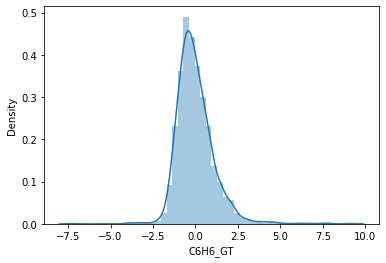

In [ ]:
sns.distplot(y_test-y_pred_linear)

#### **Hyperparameter Tuning**

In [ ]:
parameters = {"fit_intercept": [True, False],
              "copy_X": [True, False], 
              "positive": [True, False]
             }

In [ ]:
tuning_model = GridSearchCV(LinearRegression(), parameters, cv = 2) #cv: là số lần thẩm định
tuning_model.fit(X_train, y_train)
print(tuning_model.best_params_)

{'copy_X': True, 'fit_intercept': True, 'positive': False}


#### **Train the Linear Regression With Best Hyperparameters**

In [ ]:
linear_model_tuned = LinearRegression(copy_X=True, fit_intercept=True, positive=False)
linear_model_tuned.fit(X_train, y_train)

LinearRegression()

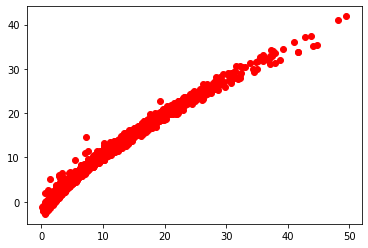

In [ ]:
y_pred_linear_tuned = linear_model_tuned.predict(X_test)
plt.scatter(y_test,y_pred_linear_tuned, color='r')

In [ ]:
print("score", linear_model_tuned.score(X_test, y_test))
print("MSE", mean_squared_error(y_test, y_pred_linear_tuned))
print("MAE", mean_absolute_error(y_test, y_pred_linear_tuned))

score 0.9764071671820306
MSE 1.2618832672622318
MAE 0.8006673081716212


# **Predictions with Support Vector Machines**

#### **Train the Support Vector Machines (default)**

In [ ]:
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [ ]:
svm_model.score(X_test,y_test)

0.9821065153542747

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


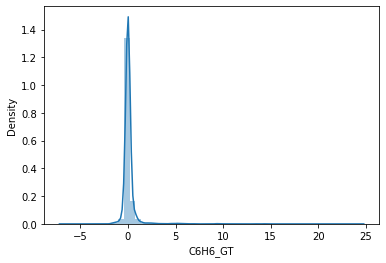

In [ ]:
sns.distplot(y_test-y_pred_svm)

#### **Hyperparameter Tuning**

In [ ]:
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']
             }

In [ ]:
# , n_iter = 10, n_jobs = -1, verbose = 2, cv = 3
# tuning_model = RandomizedSearchCV(SVR(), parameters,  n_iter = 10, n_jobs = -1, verbose = 2, cv = 3)
# tuning_model.fit(X_train, y_train)
# print(tuning_model.best_params_)

#### **Train the Support Vector Machines With Best Hyperparameters**

In [ ]:
svm_model_tuned = SVR(kernel = 'rbf', gamma = 0.001, C = 100)
svm_model_tuned.fit(X_train, y_train)

SVR(C=100, gamma=0.001)

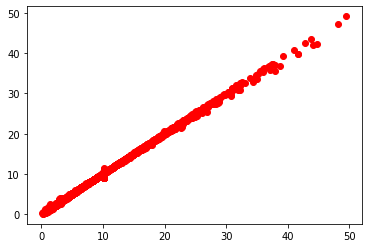

In [ ]:
y_pred_svm_tuned = svm_model_tuned.predict(X_test)
plt.scatter(y_test,y_pred_svm_tuned, color='r')

In [ ]:
print("score", svm_model_tuned.score(X_test, y_test))
print("MSE", mean_squared_error(y_test, y_pred_svm_tuned))
print("MAE", mean_absolute_error(y_test, y_pred_svm_tuned))

score 0.9987186874003605
MSE 0.06853212338222568
MAE 0.14059860914070188


# **Predictions with K-Nearest Neighbors**

#### **Train the K-Nearest Neighbors (default)**

In [ ]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [ ]:
knn_model.score(X_test,y_test)

0.9822096408572899

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


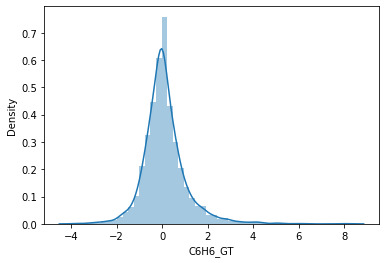

In [ ]:
sns.distplot(y_test-y_pred_knn)

#### **Hyperparameter Tuning**

In [ ]:
parameters = {'n_neighbors' : range(1, 31),
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
             }

In [ ]:
tuning_model = GridSearchCV(KNeighborsRegressor(), parameters, cv=5, scoring='neg_mean_squared_error')
tuning_model.fit(X_train, y_train)
print(tuning_model.best_params_)

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


#### **Train the K-Nearest Neighbors With Best Hyperparameters**

In [ ]:
knn_model_tuned = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 3, weights = 'distance')
knn_model_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

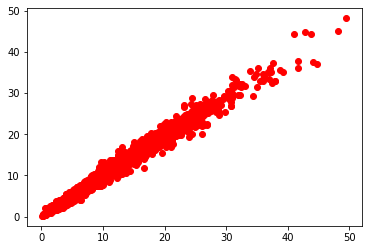

In [ ]:
y_pred_knn_tuned = knn_model_tuned.predict(X_test)
plt.scatter(y_test,y_pred_knn_tuned, color='r')

In [ ]:
print("score", knn_model_tuned.score(X_test, y_test))
print("MSE", mean_squared_error(y_test, y_pred_knn_tuned))
print("MAE", mean_absolute_error(y_test, y_pred_knn_tuned))

score 0.9826179570099935
MSE 0.9296937493328871
MAE 0.6362626049792023
